# Depth Profileの計算

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from glob import glob

from ase.io import lammpsdata, read
import os

from mlptools.analyzer.depth_profile import DepthProfileCalculator

x_width = round(5.43 * 8.5, 2)
y_width = round(5.43 * 8.5, 2)
z_width = round(5.43 * 30.0, 2)
upper_limit = 5.43 * 32.5
ang3tocm3 = 1.0e24

# path2dump = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV/data_traj"
path2dump = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/analyze_sp_with_size_of_substrate/result/SW_W-8.5_D-30.0_E-1000/data_files"
data_files = glob(f"{path2dump}/data.Si.*")
# sort data_files by the number * in data.Si.* 
data_files = sorted(data_files, key=lambda x: int(x.split(".")[-1]))
print(f"Number of data files: {len(data_files)}")

Number of data files: 6


0
1
2
3
4
5


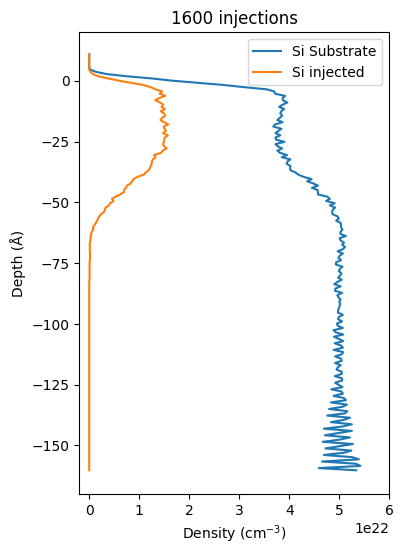

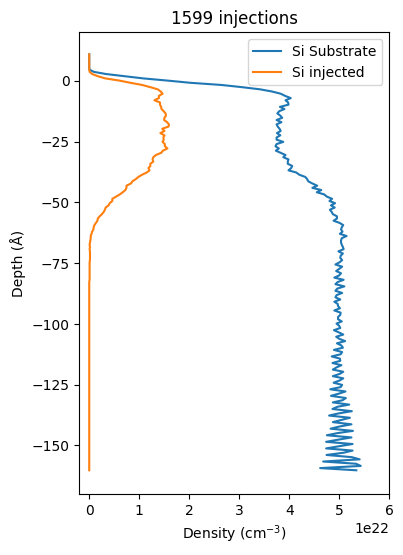

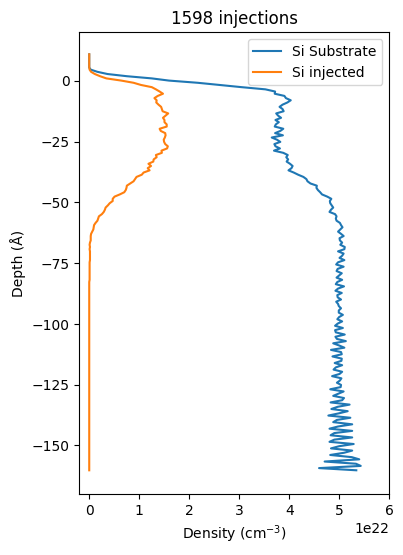

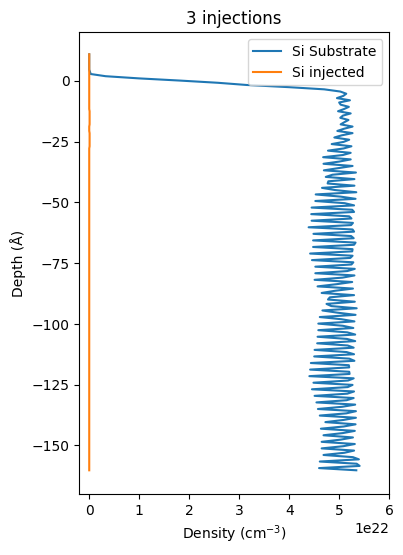

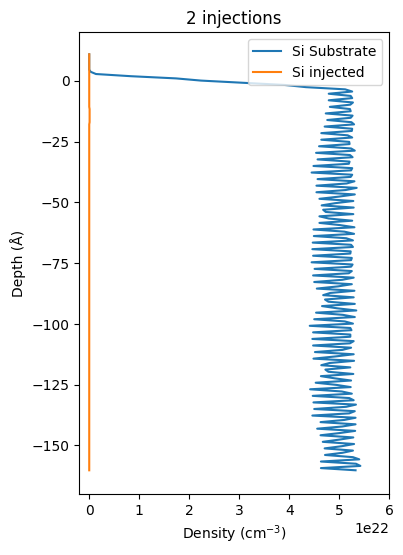

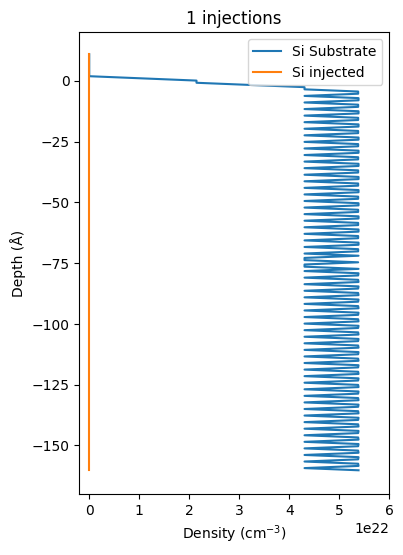

In [39]:
path2save = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV/depth_profile"
lmp_type_dict = {
    1: 14,
    2: 18,
}

for i, path2structure in enumerate(data_files[::-1]):
    print(i)
    fig, ax = plt.subplots(figsize=(4, 6))
    depth_profile_calculator = DepthProfileCalculator()
    atoms = lammpsdata.read_lammps_data(file=path2structure, style='atomic', Z_of_type=lmp_type_dict)
    depth_profile_df = depth_profile_calculator.get_depth_profile(
        atoms=atoms,
        atom_type=14,
        x_width=x_width,
        y_width=y_width,
        z_width=z_width,
        upper_limit=upper_limit,
        step=0.9
    )
    ar_depth_profile_df = depth_profile_calculator.get_depth_profile(
        atoms=atoms,
        atom_type=18,
        x_width=x_width,
        y_width=y_width,
        z_width=z_width,
        upper_limit=upper_limit,
        step=0.9
    )
    # depth_profile_df = depth_profile_df.iloc[::4, :].copy()
    # sort and reset index
    # depth_profile_df.reset_index(drop=True, inplace=True)
    ax.plot(depth_profile_df['ma'], depth_profile_df['linspace'], alpha=1, label="Si Substrate")
    ax.plot(ar_depth_profile_df['ma'], ar_depth_profile_df['linspace'], alpha=1, label="Si injected")
    ax.set_xlim(-0.2e22, 6.0e22)
    ax.set_ylim(-170, 20)
    ax.set_xlabel("Density (cm$^{-3}$)")
    ax.set_ylabel("Depth (Å)")
    ax.set_title(f"{int(int(os.path.basename(path2structure).split('.')[-1]) / 20000) + 1} injections")
    ax.legend(loc="upper right")
    # fig.savefig(f"{path2save}/{os.path.basename(path2structure)}.png")
    # dont display figure
    # plt.close()
    # break

In [25]:
depth_profile_df

,linspace,density,ma
3,10.860,0.000000e+00,0.000000e+00
4,9.955,0.000000e+00,0.000000e+00
5,9.050,0.000000e+00,0.000000e+00
6,8.145,0.000000e+00,0.000000e+00
7,7.240,0.000000e+00,0.000000e+00
...,...,...,...
98,-75.115,0.000000e+00,4.305818e+22
99,-76.020,7.561255e+22,5.378548e+22
100,-76.925,7.509109e+22,5.385998e+22
101,-77.830,0.000000e+00,4.305818e+22


# Create GIF from depth profile images

In [18]:
import imageio

In [19]:
path2images = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV/depth_profile"
path2save = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV/depth_profile"

images = glob(f"{path2images}/*.png")
images = sorted(images, key=lambda x: int(x.split(".")[-2]))
images = [imageio.imread(img) for img in images]
imageio.mimsave(f'{path2save}/output.gif', images, duration=0.2)  # duration is the time between frames in seconds

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_31505/2083200959.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(img) for img in images]
